### Conservative Forces

A mass acted on by a conservative force will have energy conservating. 

This notebook will evaluate the following force equation with its respective potential energy formula for this force acting on  a spring:
$$F(x) = -\frac{dU}{dx} = \kappa x-4q x^3$$
$$U(x) = -\frac{\kappa}{2}x^2+qx^3$$

This force and potential are evaluated for an oscillitary motion of a particle due to this force.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt;

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

From Newton's 2nd Law of motion:

    "The rate of change of momentum applied on an object is directly proportional to the force applied."
    
Assuming that no mass is lost (i.e. constant mass), this results in the following ordinary differential equation:
$$\frac{dv}{dt} = \frac{F}{m} $$
By definition of the velocity, a second ordinary differential equation can be found:
$$\frac{dx}{dt} = v $$



This can be written in matrix form:
$$\frac{d}{dt} \begin{pmatrix} v \\ x \\ \end{pmatrix} = \begin{pmatrix} \frac{F}{m} \\ v  \end{pmatrix} $$

To solve this, the Euler-Cromer method wil be utilised to solve this system of ODEs.

The Euler-Cromer method 

In [12]:
# t0 is the time it starts at 
# R0 is the initial v and x values
# k and q are the constants in the force function
def EulerCromer(f, dt, t0, R0, k, q, m, imax):
    output = np.empty((imax, 3))
    i = 0
    ti = t0
    Ri = R0
    while i < imax:
        F = f(Ri[1], k, q, m)
        Ri[0] = Ri[0] + dt*F
        Ri[1] = Ri[1] + dt*Ri[0]
        ti+=dt
        output[i, 0] = ti
        output[i, 1] = Ri[0]
        output[i, 2] = Ri[1]
        i+=1
    return output

In [20]:
def Force(x, k, q, m):
    F = (k*x-4*q*x**3)/m
    return F

def Kin(v, m):
    K = (m*v**2)/2
    return K

def Pot(x, k, q):
    U = -(k*x**2)/2+q*x**4
    return U

Firstly the system of equations will be evaluated for the k = 1N/m and q = 0.1 N/m$^3$. The initial velocity will be zero as the object is released from rest. This will then be evaluated at multiple different initial displacements:

    (a) x = 0.001m
    (b) x = 0.01m
    (c) x = 0.1m
    (d) x = 1m
    (e) x = 10m
    
    
After a solution for each is found a plot of the potential and kinetic energies will be plotted with time.

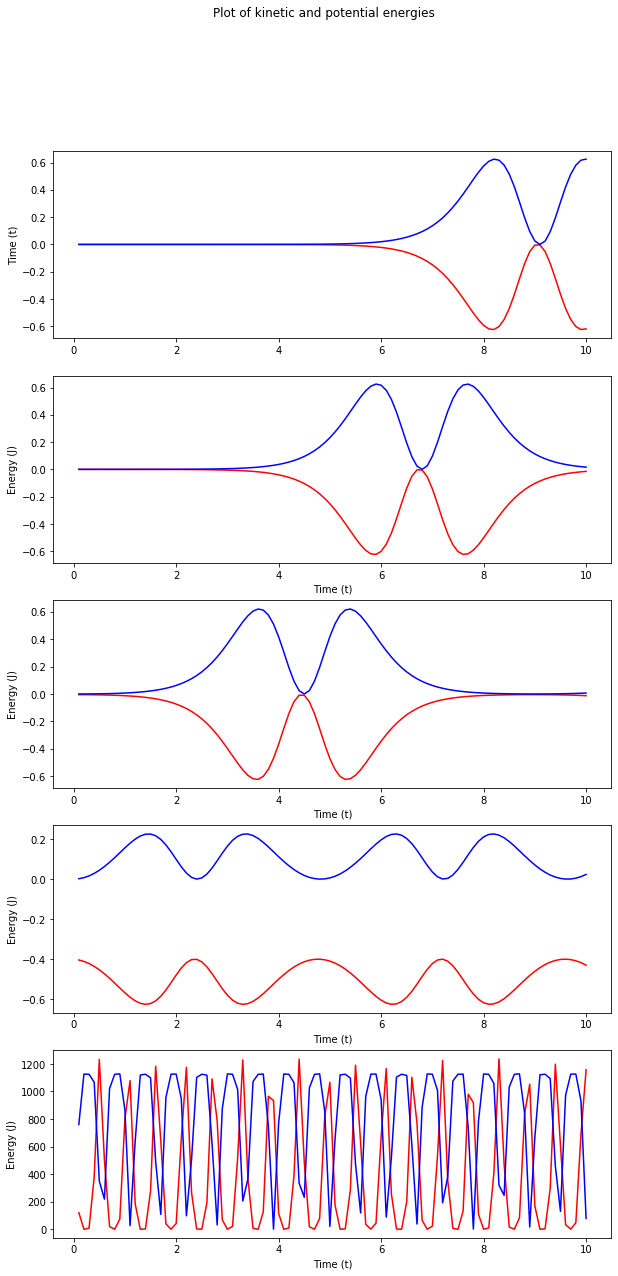

In [27]:
# Solutions for each set of initial positions
sola = EulerCromer(Force, 0.1, 0, [0,0.001], 1, 0.1, 1, 100)
solb = EulerCromer(Force, 0.1, 0, [0,0.01], 1, 0.1, 1, 100)
solc = EulerCromer(Force, 0.1, 0, [0,0.1], 1, 0.1, 1, 100)
sold = EulerCromer(Force, 0.1, 0, [0,1], 1, 0.1, 1, 100)
sole = EulerCromer(Force, 0.1, 0, [0,10], 1, 0.1, 1, 100)

# Data to be plotted for each set of solutions (time,kinetic energy and potential energy)
ta = sola[:,0]
Ka = Kin(sola[:,1], 1)
Ua = Pot(sola[:,2], 1, 0.1)
tb = solb[:,0]
Kb = Kin(solb[:,1], 1)
Ub = Pot(solb[:,2], 1, 0.1)
tc = solc[:,0]
Kc = Kin(solc[:,1], 1)
Uc = Pot(solc[:,2], 1, 0.1)
td = sold[:,0]
Kd = Kin(sold[:,1], 1)
Ud = Pot(sold[:,2], 1, 0.1)
te = sole[:,0]
Ke = Kin(sole[:,1], 1)
Ue = Pot(sole[:,2], 1, 0.1)



fig, axs = plt.subplots(5, figsize = (10,20))

plt.suptitle('Plot of kinetic and potential energies')
axs[0].plot(ta,Ua,'r-')
axs[0].plot(ta,Ka,'b-')
axs[0].set_ylabel('Energy (J)')
axs[0].set_ylabel('Time (t)')

axs[1].plot(tb,Ub,'r-')
axs[1].plot(tb,Kb,'b-')
axs[1].set_ylabel('Energy (J)')
axs[1].set_xlabel('Time (t)')

axs[2].plot(tc,Uc,'r-')
axs[2].plot(tc,Kc,'b-')
axs[2].set_ylabel('Energy (J)')
axs[2].set_xlabel('Time (t)')

axs[3].plot(td,Ud,'r-')
axs[3].plot(td,Kd,'b-')
axs[3].set_ylabel('Energy (J)')
axs[3].set_xlabel('Time (t)')

axs[4].plot(te,Ue,'r-')
axs[4].plot(te,Ke,'b-')
axs[4].set_ylabel('Energy (J)')
axs[4].set_xlabel('Time (t)');

#### Hooke's Law
The following code repeats the above calculation for Hooke's Law
$$F(x) = -kx$$
$$U(x) = \frac{kx^2}{2}$$

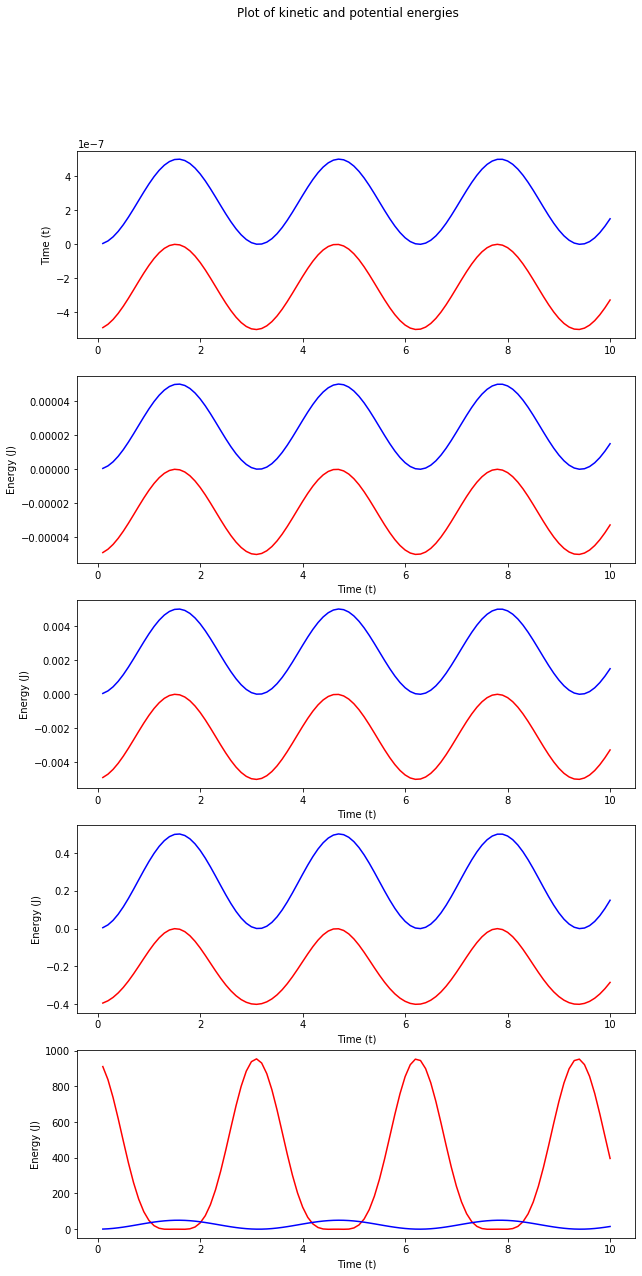

In [31]:
# Solutions for each set of initial positions
sola1 = EulerCromer(Force, 0.1, 0, [0,0.001], -1, 0, 1, 100)
solb1 = EulerCromer(Force, 0.1, 0, [0,0.01], -1, 0, 1, 100)
solc1 = EulerCromer(Force, 0.1, 0, [0,0.1], -1, 0, 1, 100)
sold1 = EulerCromer(Force, 0.1, 0, [0,1], -1, 0, 1, 100)
sole1 = EulerCromer(Force, 0.1, 0, [0,10], -1, 0, 1, 100)

# Data to be plotted for each set of solutions (time,kinetic energy and potential energy)
ta1 = sola1[:,0]
Ka1 = Kin(sola1[:,1], 1)
Ua1 = Pot(sola1[:,2], 1, 0.1)
tb1 = solb1[:,0]
Kb1 = Kin(solb1[:,1], 1)
Ub1 = Pot(solb1[:,2], 1, 0.1)
tc1 = solc1[:,0]
Kc1 = Kin(solc1[:,1], 1)
Uc1 = Pot(solc1[:,2], 1, 0.1)
td1 = sold1[:,0]
Kd1 = Kin(sold1[:,1], 1)
Ud1 = Pot(sold1[:,2], 1, 0.1)
te1 = sole1[:,0]
Ke1 = Kin(sole1[:,1], 1)
Ue1 = Pot(sole1[:,2], 1, 0.1)



fig, axs = plt.subplots(5, figsize = (10,20))

plt.suptitle('Plot of kinetic and potential energies')
axs[0].plot(ta1,Ua1,'r-')
axs[0].plot(ta1,Ka1,'b-')
axs[0].set_ylabel('Energy (J)')
axs[0].set_ylabel('Time (t)')

axs[1].plot(tb1,Ub1,'r-')
axs[1].plot(tb1,Kb1,'b-')
axs[1].set_ylabel('Energy (J)')
axs[1].set_xlabel('Time (t)')

axs[2].plot(tc1,Uc1,'r-')
axs[2].plot(tc1,Kc1,'b-')
axs[2].set_ylabel('Energy (J)')
axs[2].set_xlabel('Time (t)')

axs[3].plot(td1,Ud1,'r-')
axs[3].plot(td1,Kd1,'b-')
axs[3].set_ylabel('Energy (J)')
axs[3].set_xlabel('Time (t)')

axs[4].plot(te1,Ue1,'r-')
axs[4].plot(te1,Ke1,'b-')
axs[4].set_ylabel('Energy (J)')
axs[4].set_xlabel('Time (t)');